# 1. Summary

Welcome to this market analysis, in this case we will looking for improvement opportunities for Bellabeat.
Bellabeat is a wellness Company headquartered in San Francisco that develops wearable computers for women. The company has offices in Zagreb, San Francisco and London. It was founded in 2013 by Sandro Mur and Urška Sršen.

In this case, we will focus on the main product from Bellabeat, Leaf: A wellness tracker that can be worn as a bracelet, necklace, or clip. The Leaf tracker connects to the Bellabeat app to track activity, sleep, stress and other features.

## Stakeholders:
* Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
* Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team.
* Bellabeat marketing analytics team: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy.

## We will be answering three different questions:
* What trends can we find in the FitBit dataset?
* How are those trends related to Bellabeat?
* How can we take profit of this information and make data-driven decisions?

# 2. Data source descritpion

For this analysis, we will be using the [FitBit](https://www.kaggle.com/arashnic/fitbit) dataset.
This Kaggle dataset contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring.

This data was gathered in the timeframe of 4/12/2016 - 5/12/2016. This dataset is open source, made available through [Mobius](https://www.kaggle.com/arashnic).

We will use R and spreadsheets to perform the cleaning, analysis and visualizing process.

# 3. Cleaning and manipulation of the data

## Installing and preparing the tools on R

For this analysis, we will use the **tidyverse** framework, it will help us clean, analyze and visualize the dataset, we will use the main libraries from it: 
* lubridate for working with dates and time.
* dplyr for making data manipulation easier
* ggplot2 for data visualization
* tidyr for data cleaning

As well as other libraries for cleaning data.

the setup goes as following:


In [1]:
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)
library(here)
library(skimr)
library(janitor)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


here() starts at /kaggle/working


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




## Importing datasets

We will be the following spreadsheets from the dataset:

In [2]:
sleep <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv")
daily_activity <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_calories <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
daily_steps <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")

Let´s make sure the datasets imported correctly:

In [3]:
head(daily_activity)
head(daily_steps)

Id         ActivityDate TotalSteps TotalDistance TrackerDistance
1 1503960366 4/12/2016    13162      8.50          8.50           
2 1503960366 4/13/2016    10735      6.97          6.97           
3 1503960366 4/14/2016    10460      6.74          6.74           
4 1503960366 4/15/2016     9762      6.28          6.28           
5 1503960366 4/16/2016    12669      8.16          8.16           
6 1503960366 4/17/2016     9705      6.48          6.48           
  LoggedActivitiesDistance VeryActiveDistance ModeratelyActiveDistance
1 0                        1.88               0.55                    
2 0                        1.57               0.69                    
3 0                        2.44               0.40                    
4 0                        2.14               1.26                    
5 0                        2.71               0.41                    
6 0                        3.19               0.78                    
  LightActiveDistance SedentaryActiveDistance VeryActiveMinutes
1 6.06                0                       25               
2 4.71                0                       21               
3 3.91                0                       30               
4 2.83                0                       29               
5 5.04                0                       36               
6 2.51                0                       38               
  FairlyActiveMinutes LightlyActiveMinutes SedentaryMinutes Calories
1 13                  328                   728             1985    
2 19                  217                   776             1797    
3 11                  181                  1218             1776    
4 34                  209                   726             1745    
5 10                  221                   773             1863    
6 20                  164                   539             1728

Id         ActivityDay StepTotal
1 1503960366 4/12/2016   13162    
2 1503960366 4/13/2016   10735    
3 1503960366 4/14/2016   10460    
4 1503960366 4/15/2016    9762    
5 1503960366 4/16/2016   12669    
6 1503960366 4/17/2016    9705

Now that we are all set, let's take a view of our data. The data is in a long format, so that there are many rows with the same ID. This is due to different reasons, like different hours of the day, different intensity, etc. We may need to know how many users (id's) were taking in consideration, so for that we will count every different Id just once:

In [4]:
n_distinct(sleep$Id)
n_distinct(daily_activity$Id)
n_distinct(daily_calories$Id)
n_distinct(daily_steps$Id)

[1] 24

[1] 33

[1] 33

[1] 33

As we can see and assume from the results, there is a maximum of 33 users for the likes of activity, calories or steps. But there are less users for sleep, with only 24. Because of this size limitation and the lack of demographical information, this sample may be biased. 

Now, let's look for duplicates and remove them:

In [5]:
sum(duplicated(sleep))
sum(duplicated(daily_activity))
sum(duplicated(daily_calories))
sum(duplicated(daily_steps))

[1] 543

[1] 0

[1] 0

[1] 0

We can see that the sleep table has 543 duplicates, let's remove the duplicates:

In [6]:
sleep <- sleep %>%
  distinct() %>%
  drop_na()

Let's check again.

In [7]:
sum(duplicated(sleep))

[1] 0

Now that we removed the duplicates, let's rename the column names, so that every name is formatted with the same syntax. This will be useful for merging the tables later.

In [8]:
clean_names(sleep)
sleep <- rename_with(sleep, tolower)
clean_names(daily_activity)
daily_activity<- rename_with(daily_activity, tolower)
clean_names(daily_steps)
daily_steps <- rename_with(daily_steps, tolower)
clean_names(daily_calories)
daily_calories <- rename_with(daily_calories, tolower)

id         date                 value log_id     
1      1503960366 4/12/2016 2:47:30 AM 3     11380564589
2      1503960366 4/12/2016 2:48:30 AM 2     11380564589
3      1503960366 4/12/2016 2:49:30 AM 1     11380564589
4      1503960366 4/12/2016 2:50:30 AM 1     11380564589
5      1503960366 4/12/2016 2:51:30 AM 1     11380564589
6      1503960366 4/12/2016 2:52:30 AM 1     11380564589
7      1503960366 4/12/2016 2:53:30 AM 1     11380564589
8      1503960366 4/12/2016 2:54:30 AM 2     11380564589
9      1503960366 4/12/2016 2:55:30 AM 2     11380564589
10     1503960366 4/12/2016 2:56:30 AM 2     11380564589
11     1503960366 4/12/2016 2:57:30 AM 3     11380564589
12     1503960366 4/12/2016 2:58:30 AM 3     11380564589
13     1503960366 4/12/2016 2:59:30 AM 3     11380564589
14     1503960366 4/12/2016 3:00:30 AM 3     11380564589
15     1503960366 4/12/2016 3:01:30 AM 3     11380564589
16     1503960366 4/12/2016 3:02:30 AM 2     11380564589
17     1503960366 4/12/2016 3:03:30 AM 1     11380564589
18     1503960366 4/12/2016 3:04:30 AM 1     11380564589
19     1503960366 4/12/2016 3:05:30 AM 1     11380564589
20     1503960366 4/12/2016 3:06:30 AM 1     11380564589
21     1503960366 4/12/2016 3:07:30 AM 1     11380564589
22     1503960366 4/12/2016 3:08:30 AM 1     11380564589
23     1503960366 4/12/2016 3:09:30 AM 1     11380564589
24     1503960366 4/12/2016 3:10:30 AM 1     11380564589
25     1503960366 4/12/2016 3:11:30 AM 1     11380564589
26     1503960366 4/12/2016 3:12:30 AM 1     11380564589
27     1503960366 4/12/2016 3:13:30 AM 1     11380564589
28     1503960366 4/12/2016 3:14:30 AM 1     11380564589
29     1503960366 4/12/2016 3:15:30 AM 1     11380564589
30     1503960366 4/12/2016 3:16:30 AM 1     11380564589
⋮      ⋮          ⋮                    ⋮     ⋮          
187949 8792009665 5/4/2016 9:34:00 AM  1     11552534115
187950 8792009665 5/4/2016 9:35:00 AM  1     11552534115
187951 8792009665 5/4/2016 9:36:00 AM  1     11552534115
187952 8792009665 5/4/2016 9:37:00 AM  1     11552534115
187953 8792009665 5/4/2016 9:38:00 AM  1     11552534115
187954 8792009665 5/4/2016 9:39:00 AM  1     11552534115
187955 8792009665 5/4/2016 9:40:00 AM  1     11552534115
187956 8792009665 5/4/2016 9:41:00 AM  1     11552534115
187957 8792009665 5/4/2016 9:42:00 AM  1     11552534115
187958 8792009665 5/4/2016 9:43:00 AM  1     11552534115
187959 8792009665 5/4/2016 9:44:00 AM  1     11552534115
187960 8792009665 5/4/2016 9:45:00 AM  1     11552534115
187961 8792009665 5/4/2016 9:46:00 AM  1     11552534115
187962 8792009665 5/4/2016 9:47:00 AM  1     11552534115
187963 8792009665 5/4/2016 9:48:00 AM  1     11552534115
187964 8792009665 5/4/2016 9:49:00 AM  1     11552534115
187965 8792009665 5/4/2016 9:50:00 AM  1     11552534115
187966 8792009665 5/4/2016 9:51:00 AM  1     11552534115
187967 8792009665 5/4/2016 9:52:00 AM  1     11552534115
187968 8792009665 5/4/2016 9:53:00 AM  1     11552534115
187969 8792009665 5/4/2016 9:54:00 AM  1     11552534115
187970 8792009665 5/4/2016 9:55:00 AM  2     11552534115
187971 8792009665 5/4/2016 9:56:00 AM  1     11552534115
187972 8792009665 5/4/2016 9:57:00 AM  1     11552534115
187973 8792009665 5/4/2016 9:58:00 AM  1     11552534115
187974 8792009665 5/4/2016 9:59:00 AM  1     11552534115
187975 8792009665 5/4/2016 10:00:00 AM 1     11552534115
187976 8792009665 5/4/2016 10:01:00 AM 1     11552534115
187977 8792009665 5/4/2016 10:02:00 AM 1     11552534115
187978 8792009665 5/4/2016 10:03:00 AM 1     11552534115

id         activity_date total_steps total_distance tracker_distance
1   1503960366 4/12/2016     13162        8.50           8.50           
2   1503960366 4/13/2016     10735        6.97           6.97           
3   1503960366 4/14/2016     10460        6.74           6.74           
4   1503960366 4/15/2016      9762        6.28           6.28           
5   1503960366 4/16/2016     12669        8.16           8.16           
6   1503960366 4/17/2016      9705        6.48           6.48           
7   1503960366 4/18/2016     13019        8.59           8.59           
8   1503960366 4/19/2016     15506        9.88           9.88           
9   1503960366 4/20/2016     10544        6.68           6.68           
10  1503960366 4/21/2016      9819        6.34           6.34           
11  1503960366 4/22/2016     12764        8.13           8.13           
12  1503960366 4/23/2016     14371        9.04           9.04           
13  1503960366 4/24/2016     10039        6.41           6.41           
14  1503960366 4/25/2016     15355        9.80           9.80           
15  1503960366 4/26/2016     13755        8.79           8.79           
16  1503960366 4/27/2016     18134       12.21          12.21           
17  1503960366 4/28/2016     13154        8.53           8.53           
18  1503960366 4/29/2016     11181        7.15           7.15           
19  1503960366 4/30/2016     14673        9.25           9.25           
20  1503960366 5/1/2016      10602        6.81           6.81           
21  1503960366 5/2/2016      14727        9.71           9.71           
22  1503960366 5/3/2016      15103        9.66           9.66           
23  1503960366 5/4/2016      11100        7.15           7.15           
24  1503960366 5/5/2016      14070        8.90           8.90           
25  1503960366 5/6/2016      12159        8.03           8.03           
26  1503960366 5/7/2016      11992        7.71           7.71           
27  1503960366 5/8/2016      10060        6.58           6.58           
28  1503960366 5/9/2016      12022        7.72           7.72           
29  1503960366 5/10/2016     12207        7.77           7.77           
30  1503960366 5/11/2016     12770        8.13           8.13           
⋮   ⋮          ⋮             ⋮           ⋮              ⋮               
911 8877689391 4/13/2016     15337        9.58           9.58           
912 8877689391 4/14/2016     21129       18.98          18.98           
913 8877689391 4/15/2016     13422        7.17           7.17           
914 8877689391 4/16/2016     29326       25.29          25.29           
915 8877689391 4/17/2016     15118        8.87           8.87           
916 8877689391 4/18/2016     11423        8.67           8.67           
917 8877689391 4/19/2016     18785       17.40          17.40           
918 8877689391 4/20/2016     19948       18.11          18.11           
919 8877689391 4/21/2016     19377       17.62          17.62           
920 8877689391 4/22/2016     18258       16.31          16.31           
921 8877689391 4/23/2016     11200        7.43           7.43           
922 8877689391 4/24/2016     16674       15.74          15.74           
923 8877689391 4/25/2016     12986        8.74           8.74           
924 8877689391 4/26/2016     11101        8.43           8.43           
925 8877689391 4/27/2016     23629       20.65          20.65           
926 8877689391 4/28/2016     14890       11.30          11.30           
927 8877689391 4/29/2016      9733        7.39           7.39           
928 8877689391 4/30/2016     27745       26.72          26.72           
929 8877689391 5/1/2016      10930        8.32           8.32           
930 8877689391 5/2/2016       4790        3.64           3.64           
931 8877689391 5/3/2016      10818        8.21           8.21           
932 8877689391 5/4/2016      18193       16.30          16.30           
933 8877689391 5/5/2016      14055       10.67          10.67 

id         activity_day step_total
1   1503960366 4/12/2016    13162     
2   1503960366 4/13/2016    10735     
3   1503960366 4/14/2016    10460     
4   1503960366 4/15/2016     9762     
5   1503960366 4/16/2016    12669     
6   1503960366 4/17/2016     9705     
7   1503960366 4/18/2016    13019     
8   1503960366 4/19/2016    15506     
9   1503960366 4/20/2016    10544     
10  1503960366 4/21/2016     9819     
11  1503960366 4/22/2016    12764     
12  1503960366 4/23/2016    14371     
13  1503960366 4/24/2016    10039     
14  1503960366 4/25/2016    15355     
15  1503960366 4/26/2016    13755     
16  1503960366 4/27/2016    18134     
17  1503960366 4/28/2016    13154     
18  1503960366 4/29/2016    11181     
19  1503960366 4/30/2016    14673     
20  1503960366 5/1/2016     10602     
21  1503960366 5/2/2016     14727     
22  1503960366 5/3/2016     15103     
23  1503960366 5/4/2016     11100     
24  1503960366 5/5/2016     14070     
25  1503960366 5/6/2016     12159     
26  1503960366 5/7/2016     11992     
27  1503960366 5/8/2016     10060     
28  1503960366 5/9/2016     12022     
29  1503960366 5/10/2016    12207     
30  1503960366 5/11/2016    12770     
⋮   ⋮          ⋮            ⋮         
911 8877689391 4/13/2016    15337     
912 8877689391 4/14/2016    21129     
913 8877689391 4/15/2016    13422     
914 8877689391 4/16/2016    29326     
915 8877689391 4/17/2016    15118     
916 8877689391 4/18/2016    11423     
917 8877689391 4/19/2016    18785     
918 8877689391 4/20/2016    19948     
919 8877689391 4/21/2016    19377     
920 8877689391 4/22/2016    18258     
921 8877689391 4/23/2016    11200     
922 8877689391 4/24/2016    16674     
923 8877689391 4/25/2016    12986     
924 8877689391 4/26/2016    11101     
925 8877689391 4/27/2016    23629     
926 8877689391 4/28/2016    14890     
927 8877689391 4/29/2016     9733     
928 8877689391 4/30/2016    27745     
929 8877689391 5/1/2016     10930     
930 8877689391 5/2/2016      4790     
931 8877689391 5/3/2016     10818     
932 8877689391 5/4/2016     18193     
933 8877689391 5/5/2016     14055     
934 8877689391 5/6/2016     21727     
935 8877689391 5/7/2016     12332     
936 8877689391 5/8/2016     10686     
937 8877689391 5/9/2016     20226     
938 8877689391 5/10/2016    10733     
939 8877689391 5/11/2016    21420     
940 8877689391 5/12/2016     8064

id         activity_day calories
1   1503960366 4/12/2016    1985    
2   1503960366 4/13/2016    1797    
3   1503960366 4/14/2016    1776    
4   1503960366 4/15/2016    1745    
5   1503960366 4/16/2016    1863    
6   1503960366 4/17/2016    1728    
7   1503960366 4/18/2016    1921    
8   1503960366 4/19/2016    2035    
9   1503960366 4/20/2016    1786    
10  1503960366 4/21/2016    1775    
11  1503960366 4/22/2016    1827    
12  1503960366 4/23/2016    1949    
13  1503960366 4/24/2016    1788    
14  1503960366 4/25/2016    2013    
15  1503960366 4/26/2016    1970    
16  1503960366 4/27/2016    2159    
17  1503960366 4/28/2016    1898    
18  1503960366 4/29/2016    1837    
19  1503960366 4/30/2016    1947    
20  1503960366 5/1/2016     1820    
21  1503960366 5/2/2016     2004    
22  1503960366 5/3/2016     1990    
23  1503960366 5/4/2016     1819    
24  1503960366 5/5/2016     1959    
25  1503960366 5/6/2016     1896    
26  1503960366 5/7/2016     1821    
27  1503960366 5/8/2016     1740    
28  1503960366 5/9/2016     1819    
29  1503960366 5/10/2016    1859    
30  1503960366 5/11/2016    1783    
⋮   ⋮          ⋮            ⋮       
911 8877689391 4/13/2016    3566    
912 8877689391 4/14/2016    3793    
913 8877689391 4/15/2016    3934    
914 8877689391 4/16/2016    4547    
915 8877689391 4/17/2016    3545    
916 8877689391 4/18/2016    2761    
917 8877689391 4/19/2016    3676    
918 8877689391 4/20/2016    3679    
919 8877689391 4/21/2016    3659    
920 8877689391 4/22/2016    3427    
921 8877689391 4/23/2016    3891    
922 8877689391 4/24/2016    3455    
923 8877689391 4/25/2016    3802    
924 8877689391 4/26/2016    2860    
925 8877689391 4/27/2016    3808    
926 8877689391 4/28/2016    3060    
927 8877689391 4/29/2016    2698    
928 8877689391 4/30/2016    4398    
929 8877689391 5/1/2016     2786    
930 8877689391 5/2/2016     2189    
931 8877689391 5/3/2016     2817    
932 8877689391 5/4/2016     3477    
933 8877689391 5/5/2016     3052    
934 8877689391 5/6/2016     4015    
935 8877689391 5/7/2016     4142    
936 8877689391 5/8/2016     2847    
937 8877689391 5/9/2016     3710    
938 8877689391 5/10/2016    2832    
939 8877689391 5/11/2016    3832    
940 8877689391 5/12/2016    1849

Now, we want to merge the datasets for getting insights and trends on the data. For that, we may want to rename and format date-time.

In [9]:
sleep <- sleep %>%
  mutate(date = as_date(date,format ="%m/%d/%Y %I:%M:%S %p"))
  


daily_activity <- daily_activity %>%
  rename(date = activitydate) %>%
  mutate(date = as_date(date, format = "%m/%d/%Y"))


daily_steps <- daily_steps %>%
  rename(date = activityday) %>%
  mutate(date = as_date(date, format = "%m/%d/%Y"))

daily_calories <- daily_calories %>%
  rename(date = activityday) %>%
  mutate(date = as_date(date, format = "%m/%d/%Y"))

Great! Now let's make sure that the formatting went correctly:

In [10]:
head(daily_activity)
head(sleep)
head(daily_steps)
head(daily_calories)

id         date       totalsteps totaldistance trackerdistance
1 1503960366 2016-04-12 13162      8.50          8.50           
2 1503960366 2016-04-13 10735      6.97          6.97           
3 1503960366 2016-04-14 10460      6.74          6.74           
4 1503960366 2016-04-15  9762      6.28          6.28           
5 1503960366 2016-04-16 12669      8.16          8.16           
6 1503960366 2016-04-17  9705      6.48          6.48           
  loggedactivitiesdistance veryactivedistance moderatelyactivedistance
1 0                        1.88               0.55                    
2 0                        1.57               0.69                    
3 0                        2.44               0.40                    
4 0                        2.14               1.26                    
5 0                        2.71               0.41                    
6 0                        3.19               0.78                    
  lightactivedistance sedentaryactivedistance veryactiveminutes
1 6.06                0                       25               
2 4.71                0                       21               
3 3.91                0                       30               
4 2.83                0                       29               
5 5.04                0                       36               
6 2.51                0                       38               
  fairlyactiveminutes lightlyactiveminutes sedentaryminutes calories
1 13                  328                   728             1985    
2 19                  217                   776             1797    
3 11                  181                  1218             1776    
4 34                  209                   726             1745    
5 10                  221                   773             1863    
6 20                  164                   539             1728

id         date       value logid      
1 1503960366 2016-04-12 3     11380564589
2 1503960366 2016-04-12 2     11380564589
3 1503960366 2016-04-12 1     11380564589
4 1503960366 2016-04-12 1     11380564589
5 1503960366 2016-04-12 1     11380564589
6 1503960366 2016-04-12 1     11380564589

id         date       steptotal
1 1503960366 2016-04-12 13162    
2 1503960366 2016-04-13 10735    
3 1503960366 2016-04-14 10460    
4 1503960366 2016-04-15  9762    
5 1503960366 2016-04-16 12669    
6 1503960366 2016-04-17  9705

id         date       calories
1 1503960366 2016-04-12 1985    
2 1503960366 2016-04-13 1797    
3 1503960366 2016-04-14 1776    
4 1503960366 2016-04-15 1745    
5 1503960366 2016-04-16 1863    
6 1503960366 2016-04-17 1728

Now that we have our datasets formated, we will be able to merge the data. Let's start by merging daily_activity and sleep.

In [11]:
daily_activity_sleep <- merge(daily_activity, sleep, by=c ("id", "date"))
glimpse(daily_activity_sleep)

Rows: 187,059
Columns: 17
$ id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ date                     <date> 2016-04-12, 2016-04-12, 2016-04-12, 2016-04-…
$ totalsteps               <int> 13162, 13162, 13162, 13162, 13162, 13162, 131…
$ totaldistance            <dbl> 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, …
$ trackerdistance          <dbl> 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, …
$ loggedactivitiesdistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ veryactivedistance       <dbl> 1.88, 1.88, 1.88, 1.88, 1.88, 1.88, 1.88, 1.8…
$ moderatelyactivedistance <dbl> 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.5…
$ lightactivedistance      <dbl> 6.06, 6.06, 6.06, 6.06, 6.06, 6.06, 6.06, 6.0…
$ sedentaryactivedistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ veryactiveminutes        <int> 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 2…
$ fairlyactiveminutes      <int> 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1…
$ lightlyactiv

# 4. Analysis explanation

## What are the most interesting trends to review?

For us to compare Leaf to the analyzed product, we may need to identify trends about some main features. Let's review at first what is the relation between the steps and the sleep. For that, we may need to calculate the average steps per day for each user, because we have the total slept time.

In [12]:
daily_average <- daily_activity_sleep %>%
  group_by(id) %>%
  summarise(mean_daily_steps = mean(totalsteps), mean_daily_calories = mean(calories), mean_daily_sleep = mean(value))

head(daily_average)

id         mean_daily_steps mean_daily_calories mean_daily_sleep
1 1503960366 12128.532        1858.147            1.067432        
2 1644430081  6133.525        2777.746            1.247832        
3 1844505072  3923.863        1725.858            1.426639        
4 1927972279  1052.156        2252.630            1.054237        
5 2026352035  5585.245        1545.447            1.063249        
6 2320127002  5079.000        1804.000            1.173913

We now can see that the sleep time is to low, it's about an hour average, so maybe the dataset is wrong or has information about people with insomnia, or the app from FitBit doesn't measure correctly the time asleep. Also, it can be the measure for the deep sleep state. In any case, I'll mention this is issue in the conclusion phase. For now, let's move on with this data.

Now, let's do the same but for the steps and for the calories.

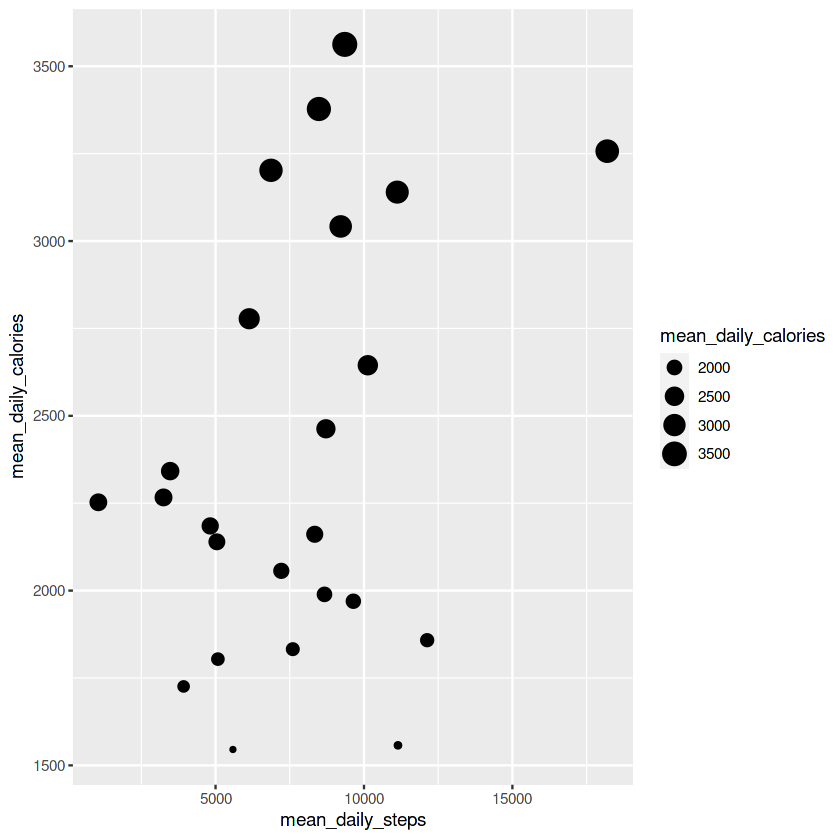

In [13]:
daily_average %>%
    ggplot(aes(x=mean_daily_steps, y=mean_daily_calories, size = mean_daily_calories)) +
    geom_point() 

Now, we reviewed that there is no connection at all between calories and steps. This can be ok because there may be different weights and heights, metabolsims and habits that aren't taken into consideration. What we may analyze though is the user level of activity. 

It may be:

* Sedentary - Less than 5000 steps a day.
* Lightly active - Between 5000 and 7499 steps a day.
* Fairly active - Between 7500 and 9999 steps a day.
* Very active - More than 10000 steps a day.

Let's make a trend out of it:

In [14]:
user_type <- daily_average %>%
  mutate(user_type = case_when(
    mean_daily_steps < 5000 ~ "sedentary",
    mean_daily_steps >= 5000 & mean_daily_steps < 7499 ~ "lightly active", 
    mean_daily_steps >= 7500 & mean_daily_steps < 9999 ~ "fairly active", 
    mean_daily_steps >= 10000 ~ "very active"
  ))

head(user_type)

id         mean_daily_steps mean_daily_calories mean_daily_sleep
1 1503960366 12128.532        1858.147            1.067432        
2 1644430081  6133.525        2777.746            1.247832        
3 1844505072  3923.863        1725.858            1.426639        
4 1927972279  1052.156        2252.630            1.054237        
5 2026352035  5585.245        1545.447            1.063249        
6 2320127002  5079.000        1804.000            1.173913        
  user_type     
1 very active   
2 lightly active
3 sedentary     
4 sedentary     
5 lightly active
6 lightly active

We've determinated the user type, now, let's count for each type.

In [15]:
user_type_percent <- user_type %>%
  group_by(user_type) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(user_type) %>%
  summarise(total_percent = total / totals) %>%
  mutate(labels = scales::percent(total_percent))

user_type_percent$user_type <- factor(user_type_percent$user_type , levels = c("very active", "fairly active", "lightly active", "sedentary"))


head(user_type_percent)

user_type      total_percent labels
1 fairly active  0.3333333     33.3% 
2 lightly active 0.2500000     25.0% 
3 sedentary      0.2083333     20.8% 
4 very active    0.2083333     20.8%

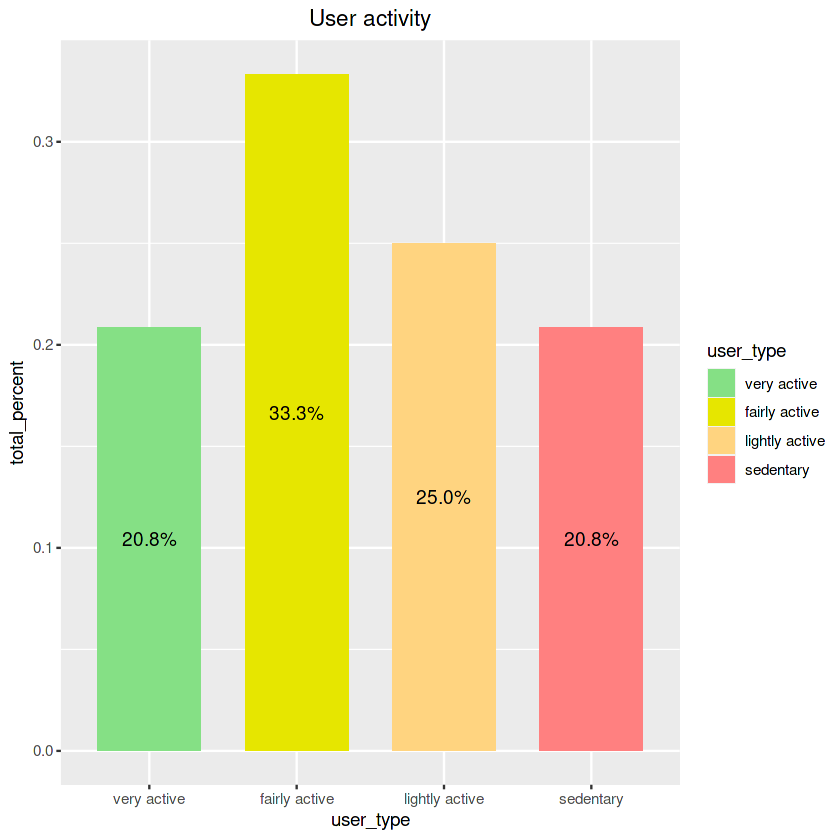

In [16]:
user_type_percent %>%
  ggplot(aes(x=user_type, y=total_percent,fill=user_type)) +
  geom_bar(stat = "identity", width = .7)+
  scale_fill_manual(values = c("#85e085","#e6e600", "#ffd480", "#ff8080")) +
  geom_text(aes(label = labels), position = position_stack(vjust = 0.5))+
  labs(title="User activity") +
  theme(plot.title = element_text(hjust = 0.5))

Now we reviewed that 80% of the users are at least lightly active. 1 of each 3 users is fairly active, and 1 of 5 is very active. Let's review what are days with the most and the least steps:

In [17]:
weekday_steps <- daily_activity_sleep %>%
  mutate(weekday = weekdays(date))

weekday_steps$weekday <-ordered(weekday_steps$weekday, levels=c("Monday", "Tuesday", "Wednesday", "Thursday",
"Friday", "Saturday", "Sunday"))

 weekday_steps <-weekday_steps%>%
  group_by(weekday, user = id) %>%
  summarize (daily_steps = mean(totalsteps))

View(weekday_steps)

`summarise()` has grouped output by 'weekday'. You can override using the
`.groups` argument.


weekday  user       daily_steps
1   Monday   1503960366 13985.454  
2   Monday   1644430081  3758.000  
3   Monday   1927972279   152.000  
4   Monday   2026352035  7536.060  
5   Monday   2347167796  8837.069  
6   Monday   3977333714 12856.100  
7   Monday   4020332650  2167.122  
8   Monday   4319703577  7738.733  
9   Monday   4388161847 10561.339  
10  Monday   4445114986  5439.873  
11  Monday   4558609924  8095.000  
12  Monday   4702921684  8715.393  
13  Monday   5553957443  8561.012  
14  Monday   5577150313  7450.412  
15  Monday   6117666160  4809.335  
16  Monday   6962181067 12457.263  
17  Monday   7086361926 11040.365  
18  Monday   8378563200 10175.058  
19  Monday   8792009665  1831.000  
20  Tuesday  1503960366 13834.503  
21  Tuesday  1927972279  1374.516  
22  Tuesday  2026352035  3096.852  
23  Tuesday  2347167796  6751.431  
24  Tuesday  3977333714 12052.120  
25  Tuesday  4020332650  6238.854  
26  Tuesday  4319703577  9473.275  
27  Tuesday  4388161847 10171.241  
28  Tuesday  4445114986  4604.015  
29  Tuesday  4558609924  9148.000  
30  Tuesday  4702921684  7948.920  
⋮   ⋮        ⋮          ⋮          
110 Saturday 4702921684 12669.094  
111 Saturday 5553957443  3198.662  
112 Saturday 5577150313 11390.355  
113 Saturday 6117666160 10513.282  
114 Saturday 6962181067 12932.783  
115 Saturday 7007744171  4631.000  
116 Saturday 7086361926 13644.201  
117 Saturday 8053475328 21887.519  
118 Saturday 8378563200  6428.059  
119 Saturday 8792009665  6209.500  
120 Sunday   1503960366 10043.212  
121 Sunday   1644430081  6309.715  
122 Sunday   1844505072  2573.000  
123 Sunday   2026352035  3670.618  
124 Sunday   2347167796  7165.855  
125 Sunday   3977333714 12035.267  
126 Sunday   4020332650  5862.000  
127 Sunday   4319703577  2943.382  
128 Sunday   4388161847 10660.391  
129 Sunday   4445114986  5746.747  
130 Sunday   4558609924  4638.569  
131 Sunday   4702921684 13680.719  
132 Sunday   5553957443  3708.836  
133 Sunday   5577150313 13890.122  
134 Sunday   6117666160  7773.983  
135 Sunday   6962181067  6113.953  
136 Sunday   7007744171  5600.000  
137 Sunday   7086361926  8041.186  
138 Sunday   8378563200  4735.598  
139 Sunday   8792009665  1619.000

Here, we can see the activity for each user every day of the week. Let's make a trend out of it:

In [18]:
weekday_steps <- weekday_steps %>%
  mutate(day_was = case_when(
    daily_steps < 5000 ~ "sedentary",
    daily_steps >= 5000 & daily_steps < 7499 ~ "lightly active", 
    daily_steps >= 7500 & daily_steps < 9999 ~ "fairly active", 
    daily_steps >= 10000 ~ "very active"
  )) 

weekday_percentage <- weekday_steps%>%
  group_by(weekday, day_was) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) %>%
  summarise(total_percent = total / totals, day_was) %>%
  mutate(labels = scales::percent(total_percent))


View(weekday_percentage)

`summarise()` has grouped output by 'weekday'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'weekday'. You can override using the
`.groups` argument.


weekday   total_percent day_was        labels
1  Monday    0.31578947    fairly active  31.6% 
2  Monday    0.10526316    lightly active 10.5% 
3  Monday    0.26315789    sedentary      26.3% 
4  Monday    0.31578947    very active    31.6% 
5  Tuesday   0.22222222    fairly active  22%   
6  Tuesday   0.11111111    lightly active 11%   
7  Tuesday   0.22222222    sedentary      22%   
8  Tuesday   0.44444444    very active    44%   
9  Wednesday 0.26315789    fairly active  26.3% 
10 Wednesday 0.21052632    lightly active 21.1% 
11 Wednesday 0.15789474    sedentary      15.8% 
12 Wednesday 0.36842105    very active    36.8% 
13 Thursday  0.45000000    fairly active  45%   
14 Thursday  0.15000000    lightly active 15%   
15 Thursday  0.15000000    sedentary      15%   
16 Thursday  0.25000000    very active    25%   
17 Friday    0.28571429    fairly active  28.6% 
18 Friday    0.28571429    lightly active 28.6% 
19 Friday    0.23809524    sedentary      23.8% 
20 Friday    0.19047619    very active    19.0% 
21 Saturday  0.04545455    fairly active  5%    
22 Saturday  0.22727273    lightly active 23%   
23 Saturday  0.22727273    sedentary      23%   
24 Saturday  0.50000000    very active    50%   
25 Sunday    0.10000000    fairly active  10%   
26 Sunday    0.30000000    lightly active 30%   
27 Sunday    0.35000000    sedentary      35%   
28 Sunday    0.25000000    very active    25%

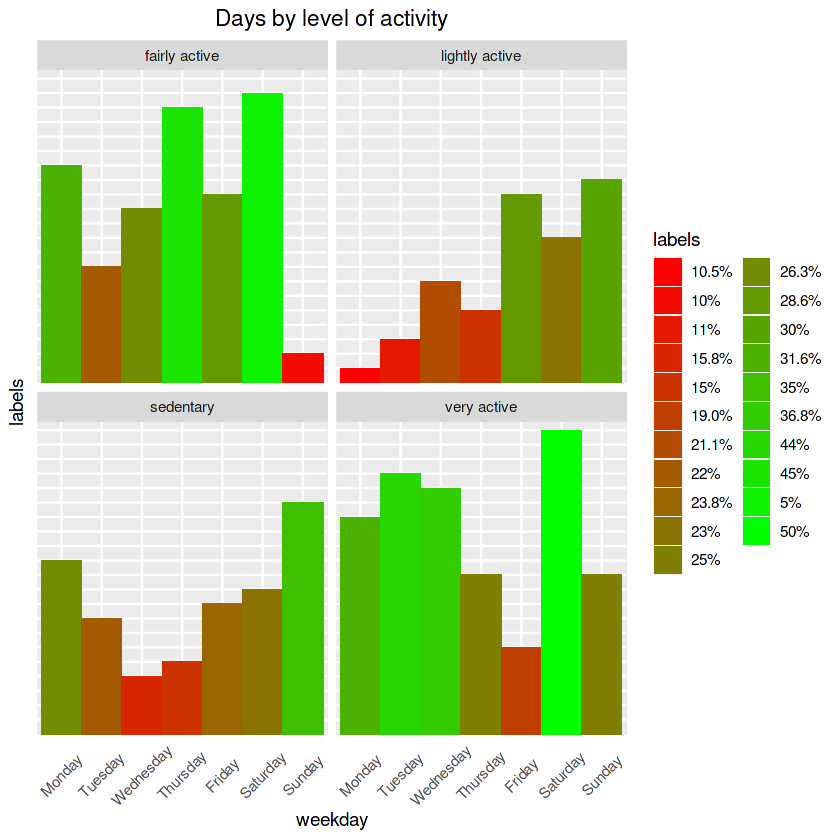

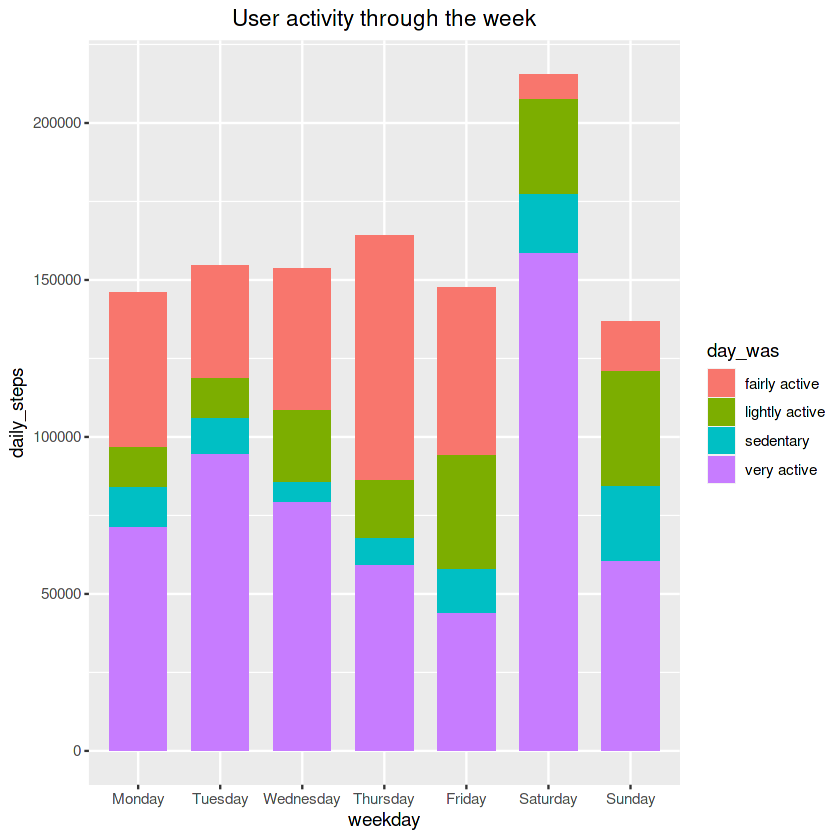

In [19]:
color_range <- colorRampPalette(c("red", "green"))
color <- color_range(21)
weekday_percentage %>%
  ggplot(aes(x=weekday, y=labels, fill = labels)) +
  scale_fill_manual(values = color) +
  geom_bar(width = 1, stat = "identity") + 
  theme(axis.text.x = element_text(angle=45, vjust = .5), axis.ticks.x = element_blank() , axis.text.y = element_blank() , axis.ticks.y = element_blank()) +
  facet_wrap(~day_was) +
  labs(title="Days by level of activity") +
  theme(plot.title = element_text(hjust = 0.5))
weekday_steps %>%
ggplot(aes(x=weekday,y = daily_steps, fill=day_was)) +
  geom_bar(stat = "identity", width = .7) +
  labs(title="User activity through the week") +
  theme(plot.title = element_text(hjust = 0.5))

We came to a big conclusion, that average people are more active on saturdays, and less active on sundays. At weekends, people are more sedentary as well, meanwhile during the week people tend to be lightly or fairly active. During the first 4 days of the week, we tend to be less lightly active and more fairly and very active. Sedentary levels decrease on wednesdays and thursdays.

# 5. Visualization results

## What did we find?

We found that people is evenly active during the week, they are the most active during satuday and the least active during sunday. A major percentage of the users (50%) are very active during saturday, but there is a lot of sedentarism too. 

There is no correlation in this analysis between the user_activity and the calories, there are several explanations for this:
* Data for the calories may not be accurate, which is more likely to be becuase the band wasn't properly adjusted.
* The analysis may be biased, so that the users take a lot of calories and don't make that many steps, or viceversa. This is likely because of the small dataset that was taken into consideration. 
* Even though there is a chance it's not biased, further analysis with more data has to be done in order to determine if weight and height are important and relevant to this matter.

We also reviewed that at least 80% of the users are active, and that 20% are sedentary on average. 

# 6. Recomendations to the stakeholders

I would definitely recommend at first that for Leaf, we need to make sure that we give proper guidance and instructions on how to use the different tools, so that we can gather even more data, give the user more accurate recommendations and positively impact on its health. 

As we reviewed data from both men and women, the dataset may need some more infomation, so that maybe we can get to know very important variables like sex, height, weight, physical goal, stress, etc. As well, one thing that is definitely going to happen is that we promote activity during the least active days, like sunday or friday, by using reminders, setting steps or caloric goals.

Other recommendation I would give is that we need to make sure to measure sleep correctly, so that we can have more information about the sleep stage (light, REM, deep) and the total time, compare that with other users and give proper advices for sleeping better. 